# Ejemplo del Principio del Anti Máximo

Veamos un ejemplo del principio en la siguiente ecuación

$$
-\Delta u=\lambda u+1\\
u(0)=u(1)=0
$$

es decir, eligiendo $h(x):=1$, con lo cuál en este caso tendríamos

$$
\displaystyle\int_{[0,1]}h\phi_1 dx>0
$$

, verifiquemos empíricamente el resultado, y luego veamos el caso reverso considerando $-h$.

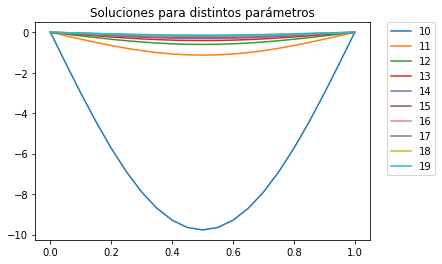

In [24]:
from fenics import *
import numpy as np
import matplotlib.pyplot as plt
import math
import pylab



# definimos la partición
mesh = IntervalMesh(20, 0, 1)

# definir base de Lagrange de polinomios de grado 2.
V = FunctionSpace(mesh, "CG", 2)




# definir las condiciones de borde
    
u_L = Constant(0) 

def boundary_L(x, on_boundary):
    tol = 1E-14
    return on_boundary and near(x[0], 0, tol)

bc_L = DirichletBC(V, u_L, boundary_L)   
    
    
    
    
    
u_R  = Constant(0) 

def boundary_R(x, on_boundary):
    tol = 1E-14
    return on_boundary and near(x[0], 1, tol)

bc_R = DirichletBC(V, u_R, boundary_R)

bcs = [bc_L, bc_R]





# Definimos arreglos para estudiar la norma
x = np.arange(19)
y =np.arange(19)
z =np.arange(19)

    
    
for i in range(1,20):


    # Definir variables
    u = TrialFunction(V)
    v = TestFunction(V)
    
    
#Definir parte derecha y formulación variacional

    #Si queremos -u''=\lambda u+x^2
    #f = Expression('x[0]*x[0]', degree=2)
    
    #Si queremos -u''=\lambda u+1
    f=Constant(1)
    
    
    
    
    
    a = inner(grad(u), grad(v))*dx - i*inner(u,v)*dx
    L = f*v*dx

    
    
    # Resolver problema
    u = Function(V)
    solve(a == L, u, bcs)
    
        
        
    # Relleno de los arreglos
    max=u(0.5)
    k=errornorm(u_L, u, 'L2')
    x[i-1]=i
    y[i-1]=abs(max)
    z[i-1]=k
 
        
   
   #Graficar
    if i>9: 
        plot(u, title='Soluciones para distintos parámetros', label=str(i))
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        


    

Con lo que vemos el ejemplo del principio del Anti-Máximo para la elección $h(x)=1$ y luego $h(x)=-1$.